---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 4

---

Please write your full name here
- **Name** : Habiba Mohsen Ateya

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Part 1: SVM

### Use the following function to plot the classification regions

In [ ]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

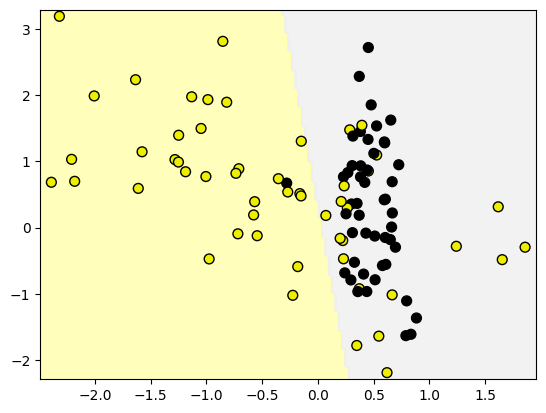

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
plot_class_regions_for_classifier(svm,X,y)



#### Question 3
1. Train an SVM classifier using linear kernel with C=0.0001.
2. Train another SVM classifier using linear kernel with C=95
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

SVM with low c

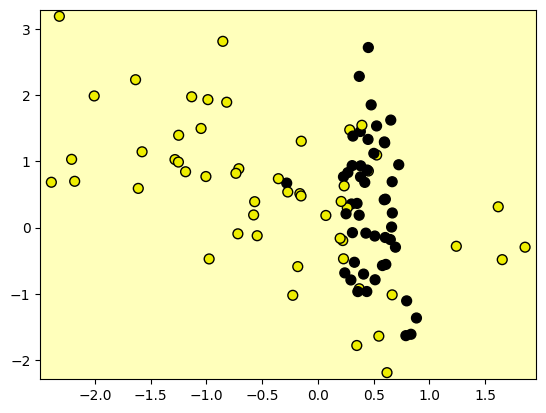

In [ ]:
svm_regulated_low_c=SVC(kernel='linear',C=0.0001)
svm_regulated_low_c.fit(x_train,y_train)
plot_class_regions_for_classifier(svm_regulated_low_c,X,y)



SVM with high c

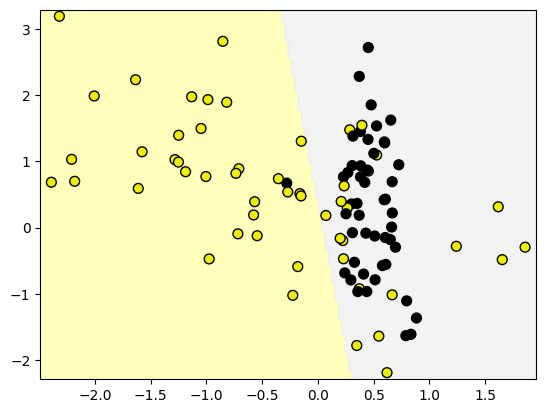

In [ ]:
svm_regulated_high_c=SVC(kernel='linear',C=95)
svm_regulated_high_c.fit(x_train,y_train)
plot_class_regions_for_classifier(svm_regulated_high_c,X,y)

## Results:
  * For low C,  misclassifications happens as the decision boundary margin is very wide
  * For high C, fewer misclassifications on the training data as the decision boundary margin is much narrower


### Use the fruits dataset in questions 4, 5, 6.

In [84]:
from google.colab import files

uploaded_file = files.upload()

Saving Habiba Shaarawy - fruit_data_with_colors.txt to Habiba Shaarawy - fruit_data_with_colors (3).txt


In [85]:
import pandas as pd
fruits = pd.read_csv('Habiba Shaarawy - fruit_data_with_colors.txt', sep='\s+')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

X_fruits=fruits[['height','width']]
y_fruits=fruits['fruit_label']
X_train_fruits, X_test_fruits, y_train_fruits, y_test_fruits = train_test_split(X_fruits, y_fruits, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fruits)
X_test_scaled = scaler.transform(X_test_fruits)
svm_model = LinearSVC()
svm_model.fit(X_train_scaled, y_train_fruits)


LinearSVC()

#### Question 5
For the previous model from question 4.
1. How many SVM models have been trained? and Why?
  **Four SVM models**
    - Reason: the model **LinearSVC** internally trains 4 linear SVM classifiers, one for each class as it uses the one vs all approach
2. Print the models' coefficients and intercepts.

In [89]:
print(f"Coefficients: {svm_model.coef_}")
print(f"Intercept: {svm_model.intercept_}")


Coefficients: [[-0.37543462  0.6011503 ]
 [-0.73989354 -0.23335249]
 [ 0.00514152  0.31778347]
 [ 1.1609762  -1.38275865]]
Intercept: [-0.36703813 -1.14363485 -0.49438185 -0.7167364 ]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.
(plot it any way you can)

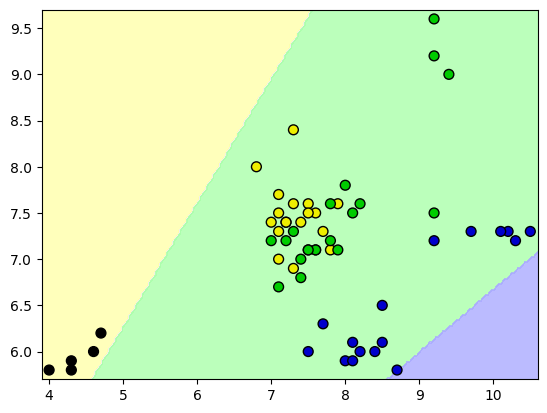

In [91]:
X_fruits_ndarray = X_fruits.values
y_fruits_ndarray=y_fruits.values

# Plotting
plot_class_regions_for_classifier(svm_model,X_fruits_ndarray,y_fruits_ndarray)


 Use the breast cancer dataset in question 7, 8, and9.

In [65]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [71]:
from sklearn.model_selection import GridSearchCV
x_train_bc,x_test_bc,y_train_bc,y_test_bc=train_test_split(X_cancer, y_cancer,test_size=0.25,random_state=0)
svm_classifier = SVC()
parameters = {'kernel': ('poly', 'rbf'), 'C': [0.001, 0.01, 0.1, 0.5, 1, 10]}
grid_search = GridSearchCV(svm_classifier, parameters)
grid_search.fit(x_train_bc, y_train_bc)
print("Best parameters:", grid_search.best_params_)



Best parameters: {'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [72]:
best_svm=SVC(kernel='rbf',C=10)
best_svm.fit(x_train_bc,y_train_bc)
training_accuracy=best_svm.score(x_train_bc,y_train_bc)
test_accuracy=best_svm.score(x_test_bc,y_test_bc)
print("Training Accuracy:",training_accuracy)
print("Testing Accuracy:",test_accuracy)


Training Accuracy: 0.9154929577464789
Testing Accuracy: 0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [76]:
# Feature Scaling to improve results
scaler = StandardScaler()
x_train_bc_scaled = scaler.fit_transform(x_train_bc)
x_test_bc_scaled = scaler.transform(x_test_bc)
best_svm.fit(x_train_bc_scaled,y_train_bc)
improved_training_score=best_svm.score(x_train_bc_scaled,y_train_bc)
improved_test_score=best_svm.score(x_test_bc_scaled,y_test_bc)
print("Improved Training Accuracy:",improved_training_score)
print("Improved Test Accuracy:",improved_test_score)

Improved Training Accuracy: 0.9882629107981221
Improved Test Accuracy: 0.993006993006993
